*Note: This ipynb will be updated as time goes by, stay tuned!*

## **Convolution Neural Networks**

Convolutional networks have significantly influenced the field of deep learning and have played a crucial role in its historical development. They were some of the first deep models to perform well. They were also some of the first neural networks to solve important commercial applications, for example to read checks in the US (developed by a research group at AT&T). The explotion of commercial interest in deep learning began when Krizhevsky won the ImageNet object recognition challenge.

**Convolutional
networks are simply neural networks that use convolution in place of
general matrix multiplication in at least one of their layers.** 

## **The Convolution Operation**

Convolution is an operation on two functions of a real valued argument. The convolution operation is typically denoted with an asterisk:

$s(t)=(x*w)(t)=\int x(a) w(t-a) da$

In convolutional network terminology, the first argument ($x$) is often referred to as the input and the second argument ($w$) as the kernel. The output is sometimes referred to as the feature map.

In real life experiments, the time index t can take on only
integer values. If we now assume that x and w are defined only on integer t, we can define the discrete convolution

$s(t)=(x*w)(t)=\sum_{a=-∞}^{\infty} x(a)w(t-a)$

For example, if we use a two-dimensional image $I$ (of size $m \times  n$) as our input, we probably also want
to use a two-dimensional kernel $K$

$S(i,j)=(I*K)(i,j)=\sum_m \sum_n I(m,n)K(i-m,j-n)$

Observe the difference with the previous discrete convolution ($t→ (i, j)$,$\,\,\,$ $a→(m,n)$ and $(t-a) → (i-m,j-n)$) because it is a 2-D (variable) image. Image $I$ is the input $x$ and kernel $K$ is the weighted function $w$.

Moreover, you must know that convolution is commutative, meaning we can equivalently write:

$S(i,j)=(K*I)(i,j)=\sum_m \sum_n I(i-m,j-n)K(m,n)$

Nonetheless, many neural network libraries implement a
related function called the cross-correlation, which is the same as convolution but without flipping the kernel:

$S(i,j)=(I\star K)(i,j)=\sum_m \sum_n I(i+m,j+n)K(m,n)$

Oberve the difference between $*$ and $\star$, the former is convolution and the latter cross-correlation. We will talk about them later in the section **"Learning in the convolutional layer"**.

To have a better understanding and interpretation of convolution you can observe the following figure where the ($2,2$) kernel is applied to a $(4,3)$ Image. This image is provided by the book "Deep Learning" from Ian Goodfellow.

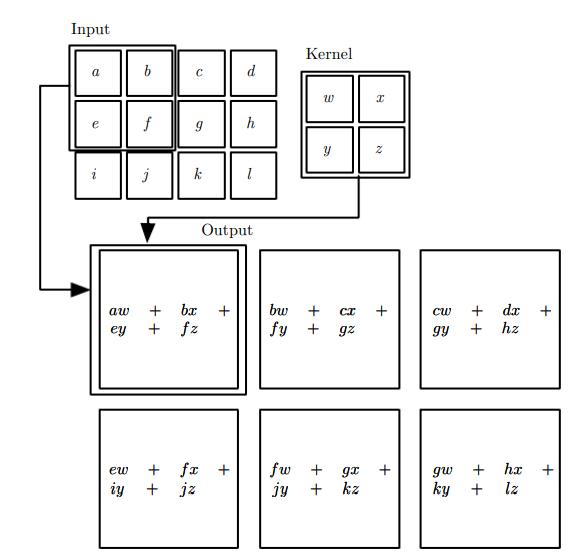

## **9.2 Motivation**

Why CNNs and not normal NNs? Well, convolution leverages three important ideas that can help improve a machine learning system: sparse interactions (1), parameter sharing (2) and equivariant representations (3)

1) Convolutional networks, typically have **sparse interactions**
(a.k.a. sparse connectivity or sparse weights). This is accomplished by making the kernel smaller than the input (image $I$). This means that we need to store fewer parameters, which both reduces the
memory requirements of the model and improves its statistical efficiency.

2) **Parameter sharing** refers to using the same parameter for more than one function in a model. It can be said that a network has tied weights, because the value of the weight applied to one input is tied to the value of a weight applied elsewhere (further reducing the storage requirements of the model). Meanwhile in a traditional neural net, each weight is unique for each connection between the previous and next layer. Convolution is thus dramatically more efficient than dense matrix multiplication in terms of the memory requirements and statistical efficiency.

3) **Equivariance to translation** function means that if the input changes, the output changes in the same way.

## **9.3 Pooling**

A typical layer of a convolutional network consists of three stages 

1) The layer performs **several convolutions** in parallel to produce a set of linear activations (kernel $K$ part). 

2) Detector stage. Each previous linear activation (kernel $K$ part) is run through a **nonlinear activation** function, such as ReLU.

3) Use of a **pooling** function to modify the output of the layer.

Here you have an example of the CNN architecture terminology:

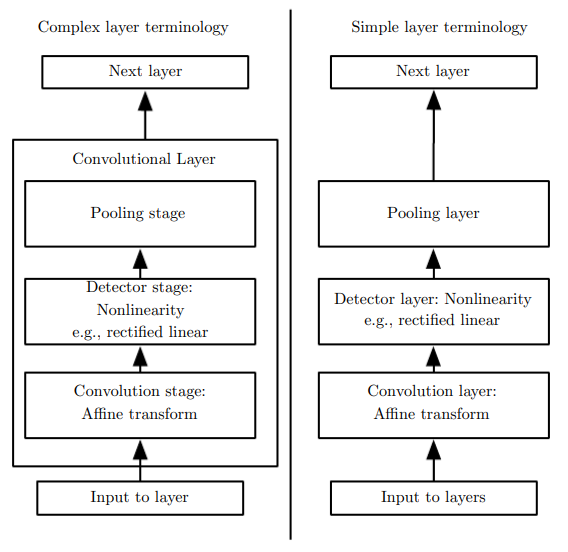


This image was obtained from the book "Deep Learning" by Ian Goodfellow.


**A pooling function replaces the output of the net at a certain location with a summary statistic of the nearby outputs.** Some popular pooling functions include: The average of a rectangular
neighborhood, the L2 norm of a rectangular neighborhood, a weighted average based on the distance from the central pixel, or **max pooling technique** (the most common one).

In all cases, pooling helps to make the representation become approximately invariant to small translations of the input (**this is very useful when dealing with adversarial machine learning which I´ll explain in another .ipynb**). Invariance to translation means that if we translate the input by a small amount, the values of most of the pooled outputs do not change! (at least noticeable).

Pooling over spatial regions produces invariance to translation, but if we pool over the outputs of separately parametrized convolutions (features), the network learns specific regions that are invariance to transformations to (for example, the position of eyebrows in a face or small rotation of numbers in MNIST).

For many tasks, pooling is also essential for handling inputs of varying size. For example, if we want to classify images of variable size, the input to the classification layer must have a fixed size. This is usually accomplished by varying the size of an offset between pooling regions so that the classification layer always receives the same number of summary statistics regardless of the input size. For example, the final pooling layer of the network may be defined to output four sets of summary statistics, one for each quadrant of an image, regardless of the image size.

## **Learning in the convolutional layer**

The predicted value of the forward propagation of the convolutional layer is:

$Y_i=B_i+\sum_{j=1}^n X_j \star K_{i,j}\,\,\,$ where $i=1,...,d$

These variables are not scalars, they are matrices.
The star does not represent multiplication but cross-correlation operation (defined at the beginning of the document). In order to update the kernel and biases after prediction, we need to compute the gradients of $\frac{\partial E}{\partial Y}$ where $E$ is the error of the Neural Network. The error equation E in a convolutional neural network (CNN) typically refers to the loss function used to quantify the discrepancy between the predicted output of the network and the true labels of the training data. For classification tasks, a common choice of loss function in CNNs is the categorical cross-entropy loss, which measures the dissimilarity between the predicted class probabilities and the true one-hot encoded labels. The error is defined as:

$E=-\frac{1}{N}\sum_{i=1}^N (y_{true}^{(i)} log(y_{pred}^{(i)}))$

Knowing that $E(y_{pred})$ the gradients of the error are: 

$\frac{\partial E}{\partial K}= X \star \frac{\partial E}{\partial Y} →\frac{\partial E}{\partial K_{i,j}}=X_j \star \frac{\partial E}{\partial Y_i} $

$\frac{\partial E}{\partial B_{i}} = \frac{\partial E}{\partial Y_i}$

$\frac{\partial E}{\partial X}= \frac{\partial E}{\partial Y} \substack{\star \\ \text{full}} rot180(K) → \frac{\partial E}{\partial X}=\frac{\partial E}{\partial Y}\substack{* \\ \text{full}} K →\frac{\partial E}{\partial X_{j}}= \sum_{i=1}^d \frac{\partial E}{\partial Y_i}\substack{* \\ \text{full}} K_{i,j}\,\,\,$ where $j=1,...,n$

Where $\substack{* \\ \text{full}}$ means full convolution and $\substack{\star \\ \text{full}}$ full cross correlation.

So, we have the equations needed to complete the backward propagation of the convolutional layer. These updates, can then be used for the gradient descent algorithm for the optimization process in the model. Nonetheless, in our situation we will use these gradients for the stochastic gradient descent (done with Keras). I only wanted to show you how a convolutional layer learns with these equations as in a similar manner normal Neural Networks do.

**Comment:**

This is the learning only for the convolutional layer (convolution stage observed in the architecture provided by Deep Learning from Ian Goodfellow). To completely train this model, we need to obtain the learning equations from the other layers/stages too (detector stage and pooling stage too). I´ll upload them as soon as I have the time to post it. In the meantime, I hope that this post has helped you to understand a bit more Convolutional Neural Networks.

**Sources/Recommendations:**

https://www.youtube.com/watch?v=QzY57FaENXg&ab_channel=IBMTechnology

https://www.youtube.com/watch?v=KuXjwB4LzSA&ab_channel=3Blue1Brown

https://www.youtube.com/watch?v=YRhxdVk_sIs&ab_channel=deeplizard

https://www.youtube.com/watch?v=qSTv_m-KFk0

https://www.youtube.com/watch?v=ZjM_XQa5s6s

## **Example of a CNN with Tensorflow and Keras**

Import libraries

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

Data preparation

In [2]:
def load_dataset():

  """
  When dealing with CNNs the input data is represented as images with multiple channels,
  such as RGB images with 3 channels (red, green, blue). We have to add an additional
  dimension for the channel. In this case, as images are grayscale we have only one channel.

  trainX.shape[0] : Number of samples in the training data
  28 : Number of pixels (height and width)
  1 : Number of channels in the images

  It is mandatory to reshape images in this way because the input of CNNs are of type:
  (samples, height, width, channels)
  """

  (trainX, trainY), (testX, testY) = mnist.load_data()

  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))

  # one hot encoding of y
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

In [3]:
def norm_dataset(train, test):

  """
  Remember that it is always a good practice to normalize everything to know
  where we are going to. For that reason, we normalize the pixels (0-1) when
  originally they were (0-255)
  """

  train_norm = train.astype('float32')
  test_norm = test.astype('float32')

  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0

  return train_norm, test_norm

Build network architecture

In [4]:
def CNN():

  """
  In this function we will do:

  i) Set architecture.
  ii) Set an optimization algorithm for the model to minimize the loss function (e.g., SGD)
  iii) Compile the model.
  iv) Return the model already compiled.

  Some interesting things from Theory:

  a) Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1))
  Adds a 2D convolutional layer. This layer has 32 filters (each of size 3x3). The activation function is ReLU, and the weights
  are initialized using "he_uniform".  It is recommended for use with the Rectified Linear Unit (ReLU) activation function.
  Overall, the choice of kernel initializer can have an impact on the learning dynamics and convergence of the neural network,
  so it's worth experimenting with different initializers to find the one that works best for the specific problem.
  
  The input shape is 28x28 with one channel **Remember why we set the input dataset with one channel!**

  b) MaxPooling2D((2, 2))
  Adds a maxpooling layer to perform downsampling. It takes the maximum value within each 2x2 window.

  c) Flatten()
  Flattens the output from the previous layer into a 1D vector

  d) Dense(100, activation='relu', kernel_initializer='he_uniform')
  Adds a fully connected layer with 100 neurons and ReLU activation. The weights are initialized using the He uniform initializer.

  e) Dense(10, activation='softmax')
  Final fully connected layer with 10 neurons (corresponding to the number of classes) and a softmax activation function
  to produce the probability distribution of the classes
  """

  model = Sequential() #This is an API from keras to linearly stack layers

  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dense(10, activation='softmax'))

  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=["accuracy"])

  return model

Train the model and test it.

In [5]:
from sklearn.model_selection import train_test_split
from keras.callbacks import LambdaCallback

def execute_CNN(dataX, dataY, testX, testY):

    """
    Here we will develop 2 stages:

    1) Training:

      i) Divide the training set into: Train and Validation sets
      ii) Call out model architecture to compile it
      iii) Create a callback function to obtain the accuracy and loss per batch because keras only stores
          these values at the end of each epoch, so we have to do it manually.
      iv) Train it.

    2) Evaluation (testing):

      v) Run the trained model to obtain final results
    """

    score = list()

    # i)
    trainX, valX, trainY, valY = train_test_split(dataX, dataY, test_size=0.2, random_state=1)

    batch_losses=[]
    batch_accuracies=[]

    # ii)
    model = CNN()

    # iii)
    batch_callback=LambdaCallback(on_batch_end=lambda batch,
                                  logs:{batch_losses.append(logs["loss"]),
                                        batch_accuracies.append(logs["accuracy"])})

    # iv)
    print("Training...\n")
    history = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(valX, valY), verbose=1, callbacks=[batch_callback])
    print("Training finished.\n")

    #verbose=1 to show the evolution of the model with time


    # v)
    print("Evaluation...\n")
    
    #Observe that we aren´t using epochs here (because we are evaluating the final test set with the already trained model)
    #There are no epochs here, epochs are for training.
    
    final_loss, final_accuracy= model.evaluate(testX, testY, verbose=1)
    
    print("Evaluation finished.\n")
    print(final_accuracy)
    print('Accuracy of the final trained value with the test set: %.3f %%' % (final_accuracy * 100.0))
    print('Loss of the final trained value with the test set: %.3f' % (final_loss))

    #Here we store the final accuracy of the model in the test set

    return final_loss, final_accuracy, history, batch_losses, batch_accuracies

Execute the complete model in a final function

In [6]:
def CNN_execution():

  """
  Here we will execute all the steps developed previously:

  i) Load the dataset.
  ii) Normalize the pixels in dataset.
  iii) Compile the model architecture.
  iv) Call the model (train + evaluate).
  v) Save the CNNs parameters after training for possible use in the future.
  vi) Return our variables of interest to perform a quantitative study.
  """

  trainX, trainY, testX, testY = load_dataset()

  trainX, testX = norm_dataset(trainX, testX)
  
  model = CNN()

  final_loss, final_accuracy, history, batch_losses, batch_accuracies = execute_CNN(trainX, trainY, testX, testY)

  model.save('model_parameters.h5')

  return final_loss, final_accuracy, history, batch_losses, batch_accuracies

In [7]:
final_loss, final_accuracy, history, batch_losses, batch_accuracies = CNN_execution()

Training...

Epoch 1/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1474 - accuracy: 0.9534 - val_loss: 0.0908 - val_accuracy: 0.9713
Epoch 2/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.0491 - accuracy: 0.9847 - val_loss: 0.0732 - val_accuracy: 0.9768
Epoch 3/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0347 - accuracy: 0.9891 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 4/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0246 - accuracy: 0.9921 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 5/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0445 - val_accuracy: 0.9867
Epoch 6/20
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0133 - accuracy: 0.9958 - val_loss: 0.0436 - val_accuracy: 0.9873
Epoch 7/20
1500/1500 [==============================] - 25s 16ms/step - loss: 0.0117 - accuracy: 0.9966 - val_l

## **Results visualization**

What interest us the most is the accuracy and loss per batch in these two first plots to see how it evolves.

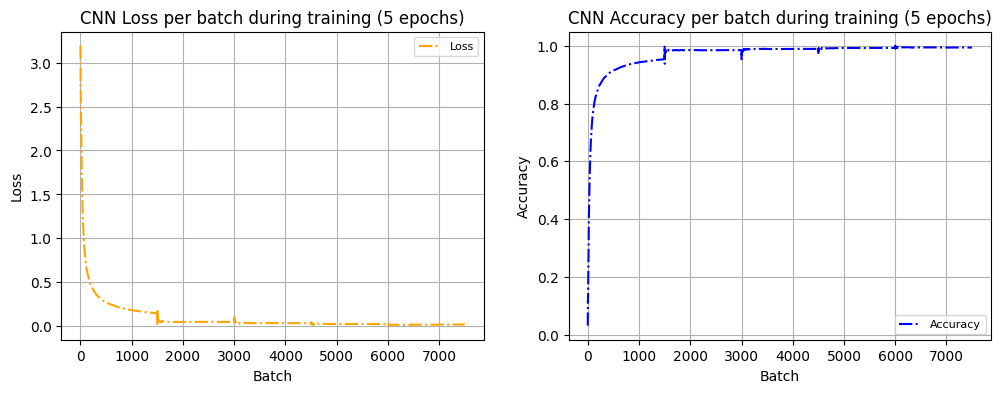

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Let´s show the loss and accuracy per batch for 5 epochs

batch_loss2=batch_losses[0:1500*5]
batch_accuracy2=batch_accuracies[0:1500*5]

# Let´s make the plots

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first subplot

ax1.plot(np.arange(len(batch_loss2)), batch_loss2, c="orange", linestyle="dashdot", label="Loss")
ax1.legend(fontsize=8)
ax1.set_xlabel("Batch")
ax1.set_ylabel("Loss")
ax1.set_title("CNN Loss per batch during training (5 epochs)")
ax1.grid()


# Plot the second subplot

ax2.plot(np.arange(len(batch_accuracy2)), batch_accuracy2, c="blue", linestyle="dashdot", label="Accuracy")
ax2.legend(fontsize=8)
ax2.set_xlabel("Batch")
ax2.set_ylabel("Accuracy")
ax2.set_title("CNN Accuracy per batch during training (5 epochs)")
ax2.grid()

plt.show()

Now let´s see how evolves the loss and accuracy per epoch

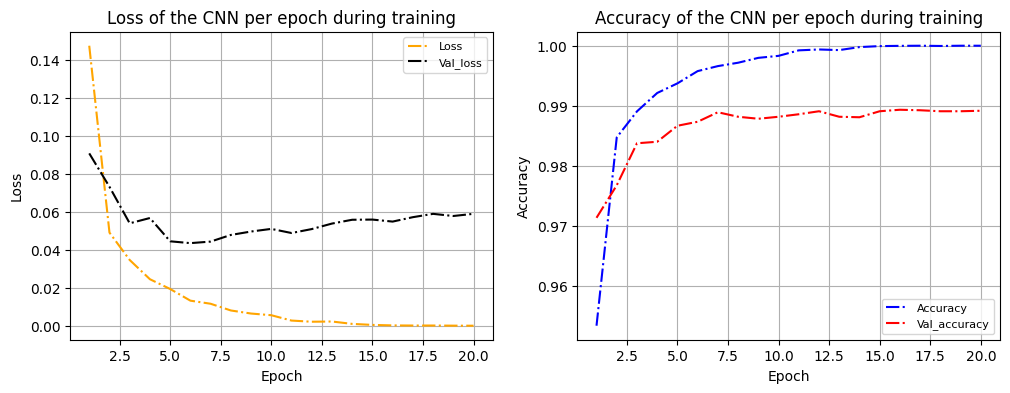

In [9]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot the first subplot

ax1.plot(np.arange(len(history.history["loss"]))+1, history.history["loss"], c="orange", linestyle="dashdot", label="Loss")
ax1.plot(np.arange(len(history.history["val_loss"]))+1, history.history["val_loss"], c="black", linestyle="dashdot", label="Val_loss")
ax1.legend(fontsize=8)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.set_title("Loss of the CNN per epoch during training")
ax1.grid()


# Plot the second subplot

ax2.plot(np.arange(len(history.history["accuracy"]))+1, history.history["accuracy"], c="blue", linestyle="dashdot", label="Accuracy")
ax2.plot(np.arange(len(history.history["val_accuracy"]))+1, history.history["val_accuracy"], c="red", linestyle="dashdot", label="Val_accuracy")
ax2.legend(fontsize=8)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.set_title("Accuracy of the CNN per epoch during training")
ax2.grid()

plt.show()

As expected, the validation loss is higher than the training loss and the validation accuracy is lower than the training accuracy. This is showing no signs of over or underfitting. **Remember: One epoch 1500 batches**

You may ask, why do we show two curves in the loss and accuracy per epoch and not in batch? Well, that´s because the validation check is done after each epoch. Once the model runs over the complete dataset (during training) once, it uses the validation dataset to check the performance with this subset that has never seen before. This can´t be done during batch training because otherwise the model would be "seeing" this validation dataset and the performance check wouldn´t be completely legitimate.

## **Image example visualization and probability prediction.**

In [10]:
# Import libraries
from numpy import argmax
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np

In [17]:
# Pick a random value from 0 to 9

aleatoric=np.random.randint(0,1000)

#(trainX, trainY), (testX, testY) = mnist.load_data()  # Load the MNIST dataset
trainX, trainY, testX, testY = load_dataset()
trainX, testX = norm_dataset(trainX, testX)

print("aleatoric index chosen is: {} and its label is {}".format(aleatoric, argmax(testY[aleatoric])))

aleatoric index chosen is: 759 and its label is 9


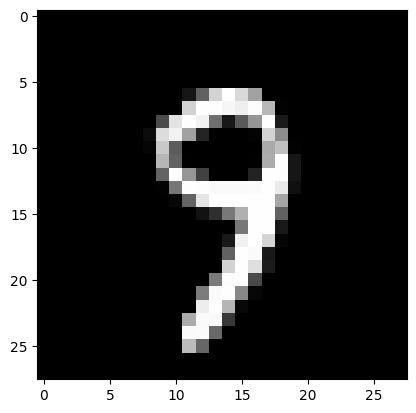

In [18]:
import matplotlib.pyplot as plt

# Remember that CNN has an input of type (batch_size, width, height, channel). We have to reshape this element.
# Let´s see what number is
plt.imshow(testX[aleatoric].reshape(1, 28, 28, 1)[0], cmap="gray")
#example_reshaped[0] because is the element, it plots the (28,28)
plt.show()

In [13]:
model = load_model("model_parameters.h5")         # Load the pretrained model parameters
prediction= model.predict(testX[aleatoric].reshape(1, 28, 28, 1))       # Predict this element with the pretrained model

print("Predicted number is: \n", argmax(prediction))                         # Show the predicted label by CNN
print("The probability of being a {} is: {:.2f}% \n".format(argmax(prediction), np.amax(prediction)*100))       # Show the probability prediction
print("The complete list of probabilities is: \n")
for i, pred in enumerate(prediction[0]):
  print("{} : {:.2f}%".format(i, pred*100))                                  # Show the probabilities of all labels

1/1 [==============================] - 0s 79ms/step
Predicted number is: 
 9
The probability of being a 9 is: 36.85% 

The complete list of probabilities is: 

0 : 17.17%
1 : 2.41%
2 : 12.40%
3 : 5.43%
4 : 7.34%
5 : 2.87%
6 : 6.34%
7 : 6.41%
8 : 2.78%
9 : 36.85%


**Remarcable comments from this results with respect normal Neural Networks**


When comparing the performance of the proposed convolutional neural network (CNN) with ([see link here](https://github.com/AlvaroHuanay/2023/blob/main/ClassicalDLAlgorithms/neuralnetwort-mnist-classification.ipynb)) a traditional neural network (NN), it becomes evident that the CNN outperforms the NN significantly. The accuracy achieved by the NN is at $81.17\%$, whereas the CNN achieves an accuracy over $98\%$ (also take into account that the NN was built from scratch using numpy and GD as optimization technique meanwhile the CNN was built using Keras and optimized with SGD).

This substantial improvement in accuracy demonstrates the superiority of CNNs in image recognition tasks. The specialized architecture and operations employed by CNNs allow them to effectively capture and extract relevant features from images, resulting in more accurate predictions.